# Assignment lab 02
- 22.03.19

## Master Class: Machine Learning (5MI2018)
- Faculty of Economic Science
- University of Neuchatel (Switzerland)
- Lab 1, see ML21_Exercise_1.pdf for more information

## Authors: 
- Romain Claret @RomainClaret
- Sylvain Robert-Nicoud @Nic0uds

In [158]:
#%run main.py
# in the specifications (adult.names): Unknown values are replaced with the character '?'

import pandas as pd

def prepare_datasets():
    header = ['age','workclass','fnlwgt','education','education-num',
              'marital-status','occupation','relationship','race','sex',
              'capital-gain','capital-loss','hours-per-week','native-country','income']
    train = pd.read_table("adult.data", sep=r',\s', na_values='?', header=None, names=header).dropna()
    evaluate = pd.read_table("adult.test", sep=r',\s', na_values='?', skiprows=[0], header=None, names=header).dropna()
    return train, evaluate

df_train, df_evaluate = prepare_datasets()

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [159]:
df_train.shape

(30162, 15)

In [160]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [161]:
for c in df_train:
    print(c, df_train[c].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
fnlwgt [ 77516  83311 215646 ...  84661 257302 201490]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-

In [162]:
df_train['marital-status']

0             Never-married
1        Married-civ-spouse
2                  Divorced
3        Married-civ-spouse
4        Married-civ-spouse
                ...        
32556    Married-civ-spouse
32557    Married-civ-spouse
32558               Widowed
32559         Never-married
32560    Married-civ-spouse
Name: marital-status, Length: 30162, dtype: object

In [163]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [164]:
# droping the education because it's redundant with education-num
# droping the occupation because it's not generic enough, we have much more categories that those captured in the training sample
# droping the relationship because it's not generic enough, we have much more categories that those captured in the training sample

df_train = df_train.drop(columns=["education", "occupation", "relationship"])
df_evaluate = df_evaluate.drop(columns=["education", "occupation", "relationship"])

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   race            30162 non-null  object
 6   sex             30162 non-null  object
 7   capital-gain    30162 non-null  int64 
 8   capital-loss    30162 non-null  int64 
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  income          30162 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [166]:
# reducing categories with multiple options into lower dimensions classification (into binary preferably) when possible
# - marital-status could be reduced as Married or Not-Married
# marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Separated' 'Married-AF-spouse' 'Widowed']
# - workclass could be recuded to 3 dimensions: Government, Private, and Self-Employment
# ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' 'Self-emp-inc' 'Without-pay']

dict_replace = {
    'marital-status' : {
        'Never-married': 'Not-Married',
        'Married-civ-spouse': 'Married',
        'Divorced': 'Not-Married',
        'Married-spouse-absent': 'Married',
        'Separated': 'Married',
        'Married-AF-spouse': 'Married',
        'Widowed': 'Not-Married'
        },
    'workclass': {
        'State-gov': 'Government',
        'Self-emp-not-inc': 'Self-Employment',
        'Federal-gov': 'Government',
        'Local-gov': 'Government',
        'Self-emp-inc': 'Self-Employment'
        }
}

df_train.replace(dict_replace, inplace=True)
df_evaluate.replace(dict_replace, inplace=True)

In [167]:
# standartizing the categories between the training and evaluation datasets
# indeed, there is a . at the end of the value in the evaluation dataset for the income category and not in the training dataset
df_evaluate["income"].replace({"<=50K.": "<=50K", ">50K.": ">50K"}, inplace=True)

In [168]:
df_evaluate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education-num   15060 non-null  int64 
 4   marital-status  15060 non-null  object
 5   race            15060 non-null  object
 6   sex             15060 non-null  object
 7   capital-gain    15060 non-null  int64 
 8   capital-loss    15060 non-null  int64 
 9   hours-per-week  15060 non-null  int64 
 10  native-country  15060 non-null  object
 11  income          15060 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.5+ MB


In [169]:
# Converting objects into categories in the dataframe
for c in df_train.select_dtypes("object"):
    df_train[c] = pd.Categorical(df_train[c])
for c in df_evaluate.select_dtypes("object"):
    df_evaluate[c] = pd.Categorical(df_evaluate[c])

In [170]:
for c in df_evaluate:
    print(c, df_evaluate[c].unique())

age [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]
workclass ['Private', 'Government', 'Self-Employment', 'Without-pay']
Categories (4, object): ['Private', 'Government', 'Self-Employment', 'Without-pay']
fnlwgt [226802  89814 336951 ... 350977 349230  83891]
education-num [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
marital-status ['Not-Married', 'Married']
Categories (2, object): ['Not-Married', 'Married']
race ['Black', 'White', 'Other', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander']
Categories (5, object): ['Black', 'White', 'Other', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander']
sex ['Male', 'Female']
Categories (2, object): ['Male', 'Female']
capital-gain [    0  7688  3103  6418  7298  3908 14084  5178 15024  2597  2907  4650
  6497  5013 27828  4934  4064  3674  2174 10605 99999  1055   114  2580
  3411  

In [202]:
from sklearn.preprocessing import LabelEncoder

# for binary categories we will be using a label encoder
# - marital-status, sex, income
# for non-binary categories we will be using a onehot encoder as decision trees are sensitive to leaves values
# note that get_dummies from pandas is exactly doing this without the complexity of using OneHotEncoder manually from sklearn
# - workclass, race, native-country

for l in ["marital-status", "sex", "income"]:
    l_enc = LabelEncoder()
    encoder = l_enc.fit(df_train[l])
    df_train["encoded_"+l] = encoder.transform(df_train[l])
    
for l in ["workclass", "race", "native-country"]:
    df_train=pd.concat([df_train,pd.get_dummies(df_train[l], prefix="encoded_"+l)],axis=1)



In [204]:
for c in df_train:
    print(c, df_train[c].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass ['Government', 'Self-Employment', 'Private', 'Without-pay']
Categories (4, object): ['Government', 'Self-Employment', 'Private', 'Without-pay']
fnlwgt [ 77516  83311 215646 ...  84661 257302 201490]
education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status ['Not-Married', 'Married']
Categories (2, object): ['Not-Married', 'Married']
race ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
Categories (5, object): ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex ['Male', 'Female']
Categories (2, object): ['Male', 'Female']
capital-gain [ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298
  1409  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597
 25236  4650

In [205]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 68 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   age                                                30162 non-null  int64   
 1   workclass                                          30162 non-null  category
 2   fnlwgt                                             30162 non-null  int64   
 3   education-num                                      30162 non-null  int64   
 4   marital-status                                     30162 non-null  category
 5   race                                               30162 non-null  category
 6   sex                                                30162 non-null  category
 7   capital-gain                                       30162 non-null  int64   
 8   capital-loss                                       30162 non-null  int64   


In [ ]:
#y = label_encoder.transform(df_train['income'])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train[list(df_train.columns)[:-1]],df_train[list(df_train.columns)[-1]],test_size=0.2,random_state=1)

X_evaluate = df_evaluate[list(df_evaluate.columns)[:-1]]
y_evaluate = df_evaluate[list(df_evaluate.columns)[-1]]

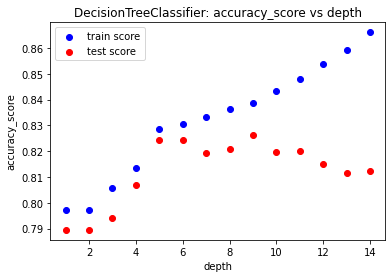

In [7]:
# run a decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

parameter_dtree_min = 1
parameter_dtree_max = 15
preds_dtree_train=[]
preds_dtree_test=[]
for depth in range(parameter_dtree_min,parameter_dtree_max):
    cl_dtree = DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=depth)
    dtree_model = cl_dtree.fit(X_train,y_train)
    y_hat_dtree_train = dtree_model.predict(X_train)
    y_hat_dtree_test = dtree_model.predict(X_test)
    preds_dtree_train.append(accuracy_score(y_train,y_hat_dtree_train))
    preds_dtree_test.append(accuracy_score(y_test,y_hat_dtree_test))
    #print(depth,"Train accuracy_score",preds_train[-1])
    #print(depth,"Test accuracy_score",preds_test[-1],"\n")
    
plt.scatter(range(parameter_dtree_min,parameter_dtree_max),preds_dtree_train,c="b",label="train score")
plt.scatter(range(parameter_dtree_min,parameter_dtree_max),preds_dtree_test,c="r",label="test score")
plt.legend(loc="upper left")
plt.title('DecisionTreeClassifier: accuracy_score vs depth')
plt.xlabel('depth')
plt.ylabel('accuracy_score')
plt.savefig('DecisionTreeClassifier.png')
plt.show()

In [8]:
#present depth with best score for evaluation dataset
max_dtree_index = preds_dtree_test.index(max(preds_dtree_test))
best_depth = list(range(parameter_dtree_min,parameter_dtree_max))[max_dtree_index]
cl_dtree = DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=best_depth)
dtree_model = cl_dtree.fit(X_train,y_train)
y_hat_dtree_train = dtree_model.predict(X_train)
y_hat_dtree_test = dtree_model.predict(X_test)
y_hat_dtree_evaluate = dtree_model.predict(X_evaluate)
print("depth="+str(best_depth),"Train accuracy_score",accuracy_score(y_train,y_hat_dtree_train))
print("depth="+str(best_depth),"Test accuracy_score",accuracy_score(y_test,y_hat_dtree_test))
print("depth="+str(best_depth),"Evaluation accuracy_score",accuracy_score(y_evaluate,y_hat_dtree_evaluate),"\n")

depth=9 Train accuracy_score 0.8387417630237474
depth=9 Test accuracy_score 0.8262887452345433
depth=9 Evaluation accuracy_score 0.8281540504648074 



In [3]:
%run main.py

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


*************************************************
Searching best Depth for Decision Tree Classifier
************************************************* 

***************************************************
Searching best K for K-Nearest Neighbors Classifier
*************************************************** 

*********************************************
Evaluate Decision Tree Classifier on new data
********************************************* 

depth=8 Train accuracy_score 0.8356749140038957
depth=8 Test accuracy_score 0.832587435769932
depth=8 Evaluation accuracy_score 0.8287516600265604 

***********************************
Evaluate KNN Classifier on new data
*********************************** 

k=23 Train accuracy_score 0.7969248621990136
k=23 Test accuracy_score 0.7876678269517653
k=23 Evaluation accuracy_score 0.7931606905710491 

